In [1]:
%config IPCompleter.greedy=True
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

diamondDf = pd.read_csv('DeepNetData/diamonds.csv', sep=',')

diamondDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [2]:
diamondDf.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
from sklearn import preprocessing
diamCol = diamondDf.columns.drop(labels =  ['color', 'Unnamed: 0', 'cut', 'clarity', 'carat'])

#standarize
diamondDf[diamCol] = preprocessing.scale(diamondDf[diamCol].values)
diamondDf.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,2,0.21,Premium,E,SI1,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,3,0.23,Good,E,VS1,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,4,0.29,Premium,I,VS2,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,5,0.31,Good,J,SI2,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


In [4]:
diamondDf.drop(columns = ['Unnamed: 0'], inplace = True) #drop useless column
diamondDf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,0.21,Premium,E,SI1,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,0.23,Good,E,VS1,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,0.29,Premium,I,VS2,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,0.31,Good,J,SI2,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
train, test = train_test_split(diamondDf, train_size=0.7 ,test_size = 0.3, random_state=100)

y_train, X_train = dmatrices('price ~ carat + cut + color + clarity + depth + table + x + y + z', data=train, return_type='dataframe')
y_test, X_test = dmatrices('price ~ carat + cut + color + clarity + depth + table + x + y + z', data=test, return_type='dataframe')

res = sm.OLS(y_train, X_train).fit()
y_pred = res.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))

print(res.summary())  

MSE:  0.08017335214753962
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.896e+04
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:13:24   Log-Likelihood:                -5959.8
No. Observations:               37758   AIC:                         1.197e+04
Df Residuals:                   37734   BIC:                         1.217e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

In [6]:
X_train.drop(columns = ['y', 'z'], inplace = True, axis = 1)
X_test.drop(columns = ['y', 'z'], inplace = True, axis = 1)
res = sm.OLS(y_train, X_train).fit()
y_pred = res.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))

print(res.summary())  

MSE:  0.08016928453259334
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.077e+04
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:13:24   Log-Likelihood:                -5960.6
No. Observations:               37758   AIC:                         1.197e+04
Df Residuals:                   37736   BIC:                         1.215e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

In [7]:
diamondDf.drop(columns = ['y', 'z'], inplace = True)
diamondDf.corr()

,carat,depth,table,price,x
carat,1.000000,0.028224,0.181618,0.921591,0.975094
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289
table,0.181618,-0.295779,1.000000,0.127134,0.195344
price,0.921591,-0.010647,0.127134,1.000000,0.884435
x,0.975094,-0.025289,0.195344,0.884435,1.000000


In [8]:
#x has high corr with carat
# depth and table have low correlation with price

X_train.drop(columns = ['x', 'depth', 'table'], inplace = True, axis = 1)
X_test.drop(columns = ['x', 'depth', 'table'], inplace = True, axis = 1)
diamondDf.drop(columns = ['x', 'depth', 'table'], inplace = True)
res = sm.OLS(y_train, X_train).fit()

y_pred = res.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))

print(res.summary())  

MSE:  0.08358596762908946
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.298e+04
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:13:24   Log-Likelihood:                -6878.9
No. Observations:               37758   AIC:                         1.380e+04
Df Residuals:                   37739   BIC:                         1.396e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

(53940, 5)

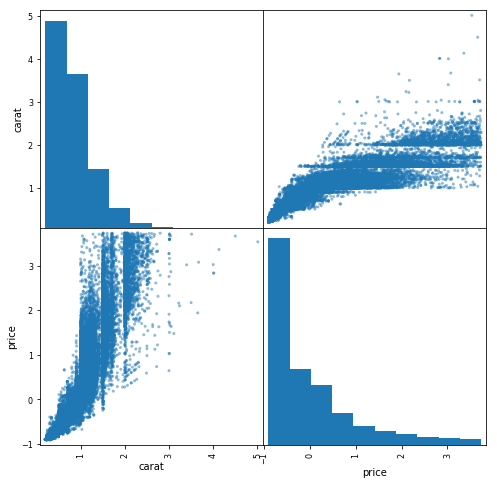

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(diamondDf, figsize=(8,8))
diamondDf.shape

In [10]:
import numpy as np
y_train, X_train = dmatrices('price ~ carat + cut + color + clarity + I(np.log(carat))', data=train, return_type='dataframe')
y_test, X_test = dmatrices('price ~ carat + cut + color + clarity + I(np.log(carat))', data=test, return_type='dataframe')

res = sm.OLS(y_train, X_train).fit()
y_pred = res.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))
print(res.summary()) 

MSE:  0.07842938164528593
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 2.329e+04
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:13:28   Log-Likelihood:                -5704.9
No. Observations:               37758   AIC:                         1.145e+04
Df Residuals:                   37738   BIC:                         1.162e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

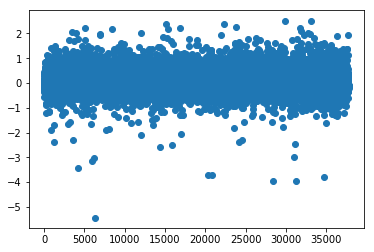

In [11]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(y_train.shape[0]), y_train['price'] - res.predict(X_train))

          price
24328  2.169297
19339  1.029528
19346  1.030530
27415  3.530654
25999  2.830048
26444  3.020803
25998  2.830048
27630  3.659245
23644  1.938937


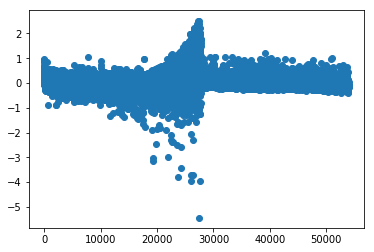

In [12]:
y_pred = res.predict(X_train)
y_out = y_train[np.abs(y_train['price'] - y_pred) > 3]
print(y_out)

plt.scatter(y_pred.index, y_train['price'] - y_pred)

y_train.drop(index = y_out.index, inplace = True)
y_pred.drop(index = y_out.index, inplace = True)
X_train.drop(index = y_out.index, inplace = True)

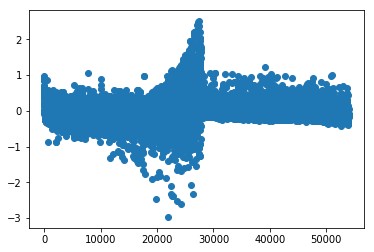

In [13]:
plt.scatter(y_pred.index, y_train['price'] - y_pred)

In [14]:
res = sm.OLS(y_train, X_train).fit()
y_pred = res.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))
print(res.summary()) 

MSE:  0.07867497343489391
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.450e+04
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:13:31   Log-Likelihood:                -4790.4
No. Observations:               37749   AIC:                             9621.
Df Residuals:                   37729   BIC:                             9792.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     